In [1]:
import cv2
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

I0000 00:00:1722849304.544126  177564 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


W0000 00:00:1722849304.653956  178094 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722849304.734456  178094 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


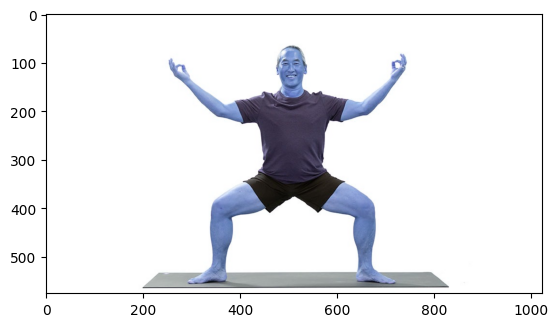

In [3]:
sample_img = cv2.imread('sample images/goddess1.jpg')
plt.imshow(sample_img)

In [4]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterates all 33 landmarks.
    for i in range(33):

        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.495945066
y: 0.198736131
z: -0.421437293
visibility: 0.999994397

LEFT_EYE_INNER:
x: 0.502874613
y: 0.180078655
z: -0.397858649
visibility: 0.999975681

LEFT_EYE:
x: 0.508401215
y: 0.181101263
z: -0.39811945
visibility: 0.999968052

LEFT_EYE_OUTER:
x: 0.513080299
y: 0.182193518
z: -0.398052961
visibility: 0.999976516

RIGHT_EYE_INNER:
x: 0.488858521
y: 0.179369718
z: -0.398979157
visibility: 0.999985218

RIGHT_EYE:
x: 0.483338296
y: 0.180948228
z: -0.399353325
visibility: 0.999983668

RIGHT_EYE_OUTER:
x: 0.479342639
y: 0.182917684
z: -0.399505436
visibility: 0.999986053

LEFT_EAR:
x: 0.519154847
y: 0.194866896
z: -0.258615226
visibility: 0.999970555

RIGHT_EAR:
x: 0.472986192
y: 0.198589325
z: -0.262832731
visibility: 0.999950051

MOUTH_LEFT:
x: 0.506034613
y: 0.223300248
z: -0.366985142
visibility: 0.999970436

MOUTH_RIGHT:
x: 0.488530427
y: 0.224860489
z: -0.370459646
visibility: 0.99996829

LEFT_SHOULDER:
x: 0.561987936
y: 0.326337874
z: -0.161295816
visibility: 0.9998521

/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [5]:
df=pd.read_csv('data/pose_landmarks_with_categories (1).csv')
df.columns

Index(['x_0_landmark', 'y_0_landmark', 'z_0_landmark', 'x_1_landmark',
       'y_1_landmark', 'z_1_landmark', 'x_2_landmark', 'y_2_landmark',
       'z_2_landmark', 'x_3_landmark', 'y_3_landmark', 'z_3_landmark',
       'x_4_landmark', 'y_4_landmark', 'z_4_landmark', 'x_5_landmark',
       'y_5_landmark', 'z_5_landmark', 'x_6_landmark', 'y_6_landmark',
       'z_6_landmark', 'x_7_landmark', 'y_7_landmark', 'z_7_landmark',
       'x_8_landmark', 'y_8_landmark', 'z_8_landmark', 'x_9_landmark',
       'y_9_landmark', 'z_9_landmark', 'x_10_landmark', 'y_10_landmark',
       'z_10_landmark', 'x_11_landmark', 'y_11_landmark', 'z_11_landmark',
       'x_12_landmark', 'y_12_landmark', 'z_12_landmark', 'x_13_landmark',
       'y_13_landmark', 'z_13_landmark', 'x_14_landmark', 'y_14_landmark',
       'z_14_landmark', 'x_15_landmark', 'y_15_landmark', 'z_15_landmark',
       'x_16_landmark', 'y_16_landmark', 'z_16_landmark', 'x_17_landmark',
       'y_17_landmark', 'z_17_landmark', 'x_18_landmark

In [6]:
df.shape ##1551 rows initially

(1402, 100)

In [7]:
df.head()

,x_0_landmark,y_0_landmark,z_0_landmark,x_1_landmark,y_1_landmark,z_1_landmark,x_2_landmark,y_2_landmark,z_2_landmark,x_3_landmark,...,x_30_landmark,y_30_landmark,z_30_landmark,x_31_landmark,y_31_landmark,z_31_landmark,x_32_landmark,y_32_landmark,z_32_landmark,category
0,0.521053,0.356214,-0.450221,0.529187,0.341411,-0.408147,0.533977,0.340983,-0.408077,0.538036,...,0.363329,0.862887,-0.040432,0.772712,0.878137,-0.218561,0.285667,0.878095,-0.182815,goddess
1,0.512882,0.163876,-0.231114,0.518046,0.141718,-0.204134,0.521644,0.141655,-0.204072,0.525616,...,0.419846,0.921415,-0.019938,0.685147,0.966032,-0.138960,0.382874,0.951417,-0.115745,goddess
2,0.458267,0.261488,-0.431007,0.470292,0.244690,-0.397263,0.476747,0.246112,-0.397145,0.482215,...,0.277964,0.898281,0.037129,0.693615,0.874767,-0.138523,0.192856,0.909546,-0.075735,goddess
3,0.434875,0.328384,0.063895,0.425171,0.318192,0.011631,0.417918,0.317824,0.011564,0.409337,...,0.642595,0.720223,0.297862,0.269280,0.762031,0.296898,0.662412,0.758198,0.407350,goddess
4,0.533043,0.214909,-0.243186,0.539489,0.196786,-0.212468,0.542779,0.196217,-0.212467,0.546295,...,0.382557,0.875855,-0.003377,0.744101,0.870744,-0.117373,0.317088,0.880104,-0.106082,goddess


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'data/pose_landmarks_with_categories (1).csv'
data = pd.read_csv(file_path)

# Split data into features (X) and target (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector classifier
clf = SVC(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(round(accuracy,3)*100,"%")

Accuracy: 0.8469750889679716
84.7 %


In [9]:
import joblib
joblib.dump(clf, 'models/svc1.sav')

['models/svc1.sav']

In [10]:
# To load the model directly
loaded_model = joblib.load('models/svc1.sav')

In [11]:
def extract_landmarks(image):
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        row = []
        for landmark in landmarks:
            row.extend([landmark.x, landmark.y, landmark.z])
        
        # Draw landmarks on the image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        return row, image
    else:
        return None, image

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    
    # Extract landmarks
    landmarks, landmarked_image = extract_landmarks(image)
    
    if landmarks is None:
        raise ValueError("No pose landmarks detected in the image.")
    
    return landmarks, landmarked_image

# Function to predict using the trained model
def predict_image(model, scaler, image_path):
    # Preprocess the image
    features, landmarked_image = preprocess_image(image_path)
    
    # Scale the features
    features_scaled = scaler.transform([features])
    
    # Make a prediction
    prediction = model.predict(features_scaled)
    
    # Display the image with landmarks
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(landmarked_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted Category: {prediction[0]}')
    plt.axis('off')
    plt.show()
    
    return prediction

/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


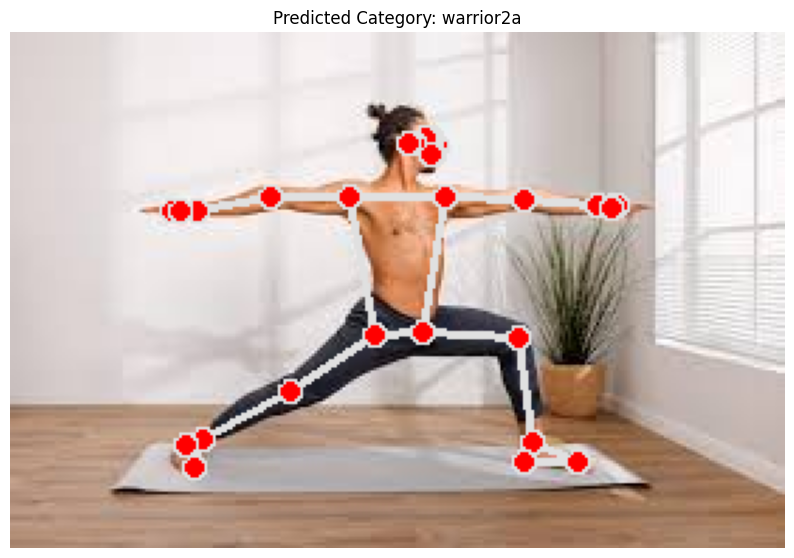

Predicted Category: warrior2a


In [12]:
image_path = "sample images/warrier1.jpeg"
predicted_category = predict_image(clf, scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


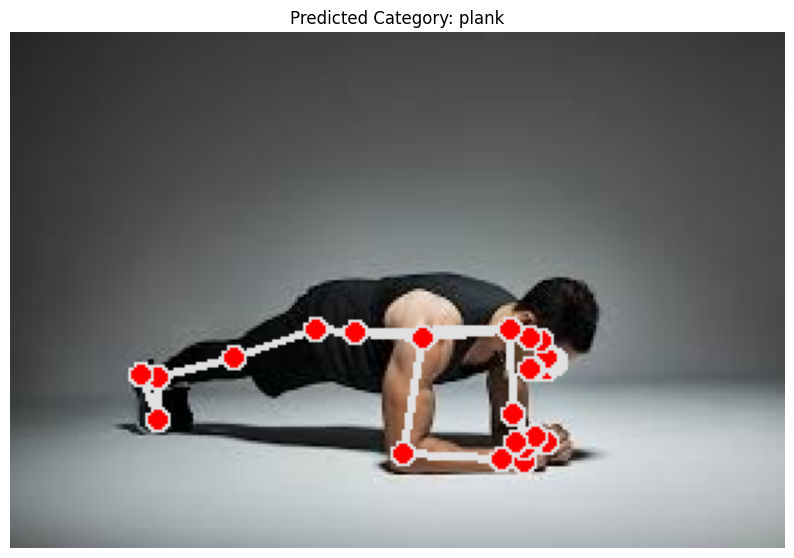

Predicted Category: plank


In [13]:
image_path = "sample images/plank1.jpeg"
predicted_category = predict_image(clf, scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


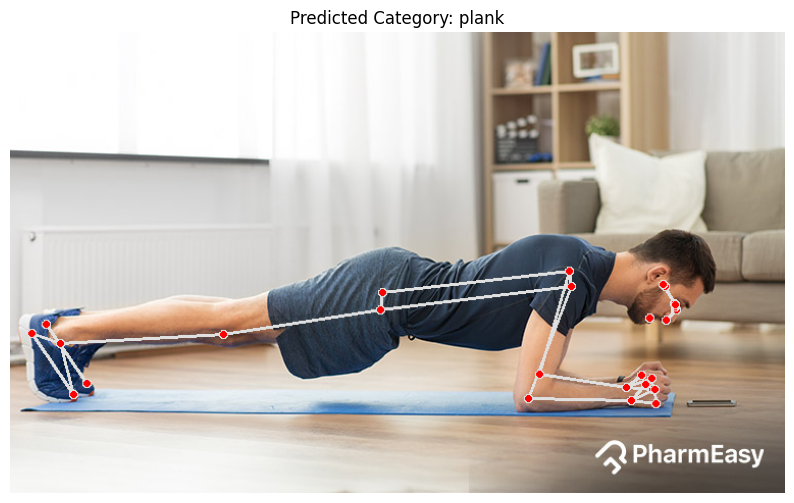

Predicted Category: plank


In [14]:
# Example usage
image_path = "sample images/plank2.jpg"
predicted_category = predict_image(clf, scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


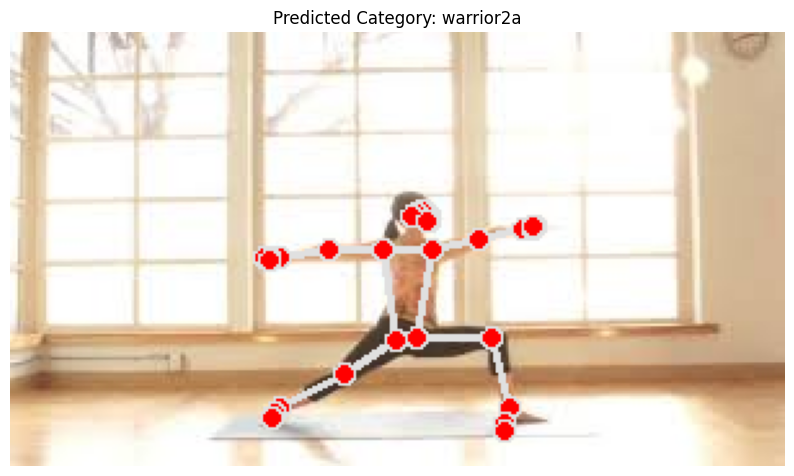

Predicted Category: warrior2a


In [15]:
image_path = "sample images/warrier2.jpeg"
predicted_category = predict_image(clf, scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


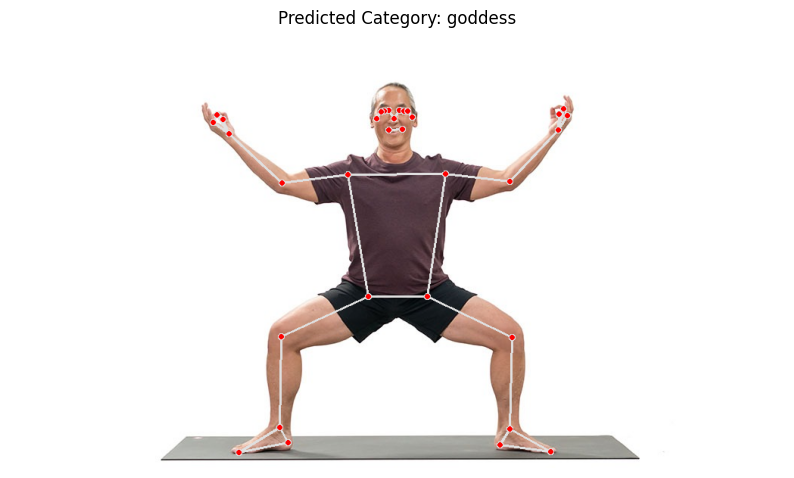

Predicted Category: goddess


In [16]:
image_path = "sample images/goddess1.jpg"
predicted_category = predict_image(clf, scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

In [17]:
# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

# Function for real-time pose estimation and classification
def real_time_pose_estimation(model, scaler):
    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        landmarks, landmarked_image = extract_landmarks(frame)
        
        if landmarks:
            features_scaled = scaler.transform([landmarks])
            prediction = model.predict(features_scaled)
            cv2.putText(landmarked_image, f'Predicted Category: {prediction[0]}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        
        cv2.imshow('Pose Estimation', landmarked_image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Call the function to start real-time pose estimation
real_time_pose_estimation(clf, scaler)

I0000 00:00:1722849307.282143  177564 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89), renderer: Apple M1
W0000 00:00:1722849307.440485  178218 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722849307.461282  178218 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feat